In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the paths to your image folders
train_dir = 'F:/Machine_Learning/Skin_C/Dataset/train'
validation_dir = 'F:/Machine_Learning/Skin_C/Dataset/validation'
test_dir = 'F:/Machine_Learning/Skin_C/Dataset/test'

# Define the parameters for image preprocessing and augmentation
batch_size = 32
image_size = (224, 224)  # Adjust according to your model's input size

# Create data generators for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'  # Set to 'categorical' if you have multiple classes
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'  # Set to 'categorical' if you have multiple classes
)

# Build your model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Use 'softmax' if you have multiple classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
num_epochs = 10  # Adjust the number of epochs as needed
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Display the accuracy and loss values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train - loss: {train_loss[epoch]:.4f} - acc: {train_acc[epoch]:.4f}")
    print(f"Validation - loss: {val_loss[epoch]:.4f} - acc: {val_acc[epoch]:.4f}")
    print('-' * 50)


Found 9605 images belonging to 2 classes.
Found 9605 images belonging to 2 classes.
Epoch 1/10
301/301 [==============================] - 261s 864ms/step - loss: 0.7662 - accuracy: 0.8251 - val_loss: 0.2743 - val_accuracy: 0.8782
Epoch 2/10
301/301 [==============================] - 211s 700ms/step - loss: 0.2801 - accuracy: 0.8791 - val_loss: 0.2628 - val_accuracy: 0.8987
Epoch 3/10
301/301 [==============================] - 203s 674ms/step - loss: 0.2441 - accuracy: 0.8993 - val_loss: 0.1826 - val_accuracy: 0.9249
Epoch 4/10
301/301 [==============================] - 207s 688ms/step - loss: 0.2099 - accuracy: 0.9143 - val_loss: 0.1823 - val_accuracy: 0.9242
Epoch 5/10
301/301 [==============================] - 206s 684ms/step - loss: 0.2101 - accuracy: 0.9153 - val_loss: 0.2227 - val_accuracy: 0.9003
Epoch 6/10
301/301 [==============================] - 206s 683ms/step - loss: 0.1769 - accuracy: 0.9308 - val_loss: 0.2070 - val_accuracy: 0.9280
Epoch 7/10
301/301 [====================

In [7]:
train_acc_formatted = "{:.2f}%".format(train_acc[epoch] * 100)
print(f"Train - loss: {train_loss[epoch]:.4f} - acc: {train_acc_formatted}")



Train - loss: 0.1063 - acc: 96.21%


In [9]:
model.save('F:/Machine_Learning/Skin_C/Dataset/skin_cancer_model.h5')

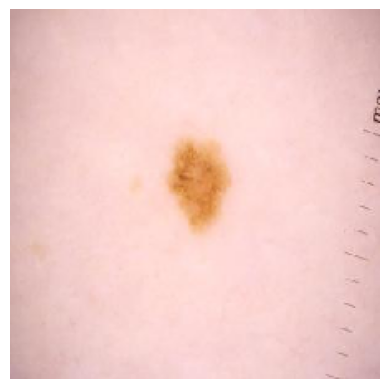

1/1 [==============================] - 0s 49ms/step
Predicted Class: Benign
Predicted Percentage: 99.58%


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('F:/Machine_Learning/Skin_C/Dataset/skin_cancer_model.h5')

# Set the path to your test image
test_image_path = 'F:/Machine_Learning/Skin_C/Dataset/test/benign/a.jpg'

# Load and preprocess the test image
test_image = load_img(test_image_path, target_size=(224, 224))
test_image_array = img_to_array(test_image)
test_image = np.expand_dims(test_image_array, axis=0)
test_image = test_image / 255.0  # Normalize the pixel values

# Display the test image
plt.imshow(test_image_array.astype(np.uint8))
plt.axis('off')
plt.show()

# Make predictions on the test image
predictions = model.predict(test_image)

# Get the predicted class label
if predictions[0] > 0.5:
    predicted_class = 'Malignant'
    predicted_percentage = predictions[0] * 100
else:
    predicted_class = 'Benign'
    predicted_percentage = (1 - predictions[0]) * 100

# Print the predicted class and percentage
print('Predicted Class:', predicted_class)
print('Predicted Percentage: {:.2f}%'.format(predicted_percentage[0]))


1/1 [==============================] - 0s 69ms/step


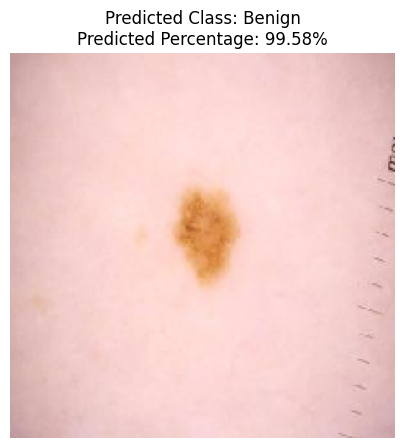

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('F:/Machine_Learning/Skin_C/Dataset/skin_cancer_model.h5')

# Set the path to your test image
test_image_path = 'F:/Machine_Learning/Skin_C/Dataset/test/benign/a.jpg'

# Load and preprocess the test image
test_image = load_img(test_image_path, target_size=(224, 224))
test_image_array = img_to_array(test_image)
test_image = np.expand_dims(test_image_array, axis=0)
test_image = test_image / 255.0  # Normalize the pixel values

# Make predictions on the test image
predictions = model.predict(test_image)

# Get the predicted class label
if predictions[0] > 0.5:
    predicted_class = 'Malignant'
    predicted_percentage = predictions[0] * 100
else:
    predicted_class = 'Benign'
    predicted_percentage = (1 - predictions[0]) * 100

# Display the input image and predicted class
plt.figure(figsize=(5, 5))
plt.imshow(test_image_array.astype(np.uint8))
plt.title(f'Predicted Class: {predicted_class}\nPredicted Percentage: {predicted_percentage[0]:.2f}%')
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 69ms/step


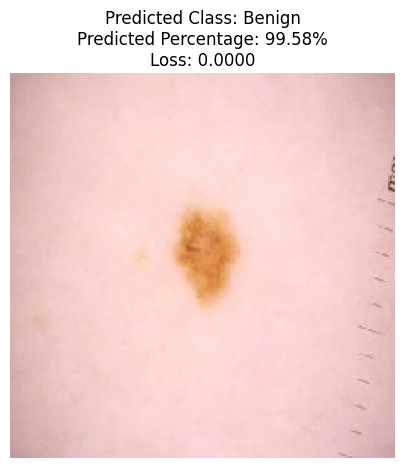

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('F:/Machine_Learning/Skin_C/Dataset/skin_cancer_model.h5')

# Set the path to your test image
test_image_path = 'F:/Machine_Learning/Skin_C/Dataset/test/benign/a.jpg'

# Load and preprocess the test image
test_image = load_img(test_image_path, target_size=(224, 224))
test_image_array = img_to_array(test_image)
test_image = np.expand_dims(test_image_array, axis=0)
test_image = test_image / 255.0  # Normalize the pixel values

# Make predictions on the test image
predictions = model.predict(test_image)

# Get the predicted class label
if predictions[0] > 0.5:
    predicted_class = 'Malignant'
    predicted_percentage = predictions[0] * 100
else:
    predicted_class = 'Benign'
    predicted_percentage = (1 - predictions[0]) * 100

# Evaluate the model on the test image to get the loss and metrics
loss, accuracy = model.evaluate(test_image, verbose=0)

# Display the input image, predicted class, and loss
plt.figure(figsize=(5, 5))
plt.imshow(test_image_array.astype(np.uint8))
plt.title(f'Predicted Class: {predicted_class}\nPredicted Percentage: {predicted_percentage[0]:.2f}%\nLoss: {loss:.4f}')
plt.axis('off')
plt.show()
